In [1]:
import os
os.chdir("../")
os.getcwd()

'/home/honza/Documents/UniHack/fast-form'

In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
import json
import cv2
from preprocessing.preprocess import preprocess
from IPython.display import Image

import PIL.Image

from structure_parser.formstructureparser import FormStructureParser
from field_recognizer.recognize_all import recognize

from field_recognizer.model import load_model, load_result_mapper

Using TensorFlow backend.


In [5]:
from main import process_document, output_data
image_path = "test/example_forms/uceni/scan-h2.png"
with open("test/example_forms/uceni/config.json", 'r') as f:
    config = json.load(f) 

fsp = FormStructureParser(config)
model_structure_path = "model_data/model_letters.json"
model_weights_path = "model_data/model_letters.h5"
result_mapper_path = "model_data/model_letters_mapping.json"
# load model
model_letters = load_model(model_structure_path, model_weights_path)
# load result mapper
letter_mapper = load_result_mapper(result_mapper_path)

model_structure_path = "model_data/model_numbers.json"
model_weights_path = "model_data/model_numbers.h5"
result_mapper_path = "model_data/model_numbers_mapping.json"
# load model
model_numbers = load_model(model_structure_path, model_weights_path)
# load result mapper
number_mapper = load_result_mapper(result_mapper_path)

im = cv2.imread(image_path)

# process

# im = preprocess(im, config)
# form_data = fsp.process_form(im)
form_data = process_document(im, config, model_letters, model_numbers, letter_mapper, number_mapper)
filename = output_data(form_data, image_path)

Loaded model from disk
Loaded model from disk


The quick brown fox jumps 
THE QVJCK BRCGN ECF JUMPS 
'T' with accuracy 0.6568142771720886
box_type:letters


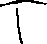

'H' with accuracy 0.9995137453079224
box_type:letters


'E' with accuracy 0.998778760433197
box_type:letters


' ' with accuracy 1.0
box_type:letters
nothing
'Q' with accuracy 0.9780680537223816
box_type:letters


'V' with accuracy 0.6517539620399475
box_type:letters


'J' with accuracy 0.868336021900177
box_type:letters


'C' with accuracy 0.9547510743141174
box_type:letters


'K' with accuracy 0.9989914298057556
box_type:letters


' ' with accuracy 1.0
box_type:letters
nothing
'B' with accuracy 0.9981057643890381
box_type:letters


'R' with accuracy 0.9996705055236816
box_type:letters


'C' with accuracy 0.9675335884094238
box_type:letters


'G' with accuracy 0.8455354571342468
box_type:letters


'N' with accuracy 0.5104581117630005
box_type:letters


' ' with accuracy 1.0
box_type:letters
nothing
'E' with accuracy 0.6004782319068909
box_type:letters


'C' with accuracy 0.9987133741378784
box_type:letters


'F' with accuracy 0.6131078004837036
box_type:letters


' ' with accuracy 1.0
box_type:letters
nothing
'J' with accuracy 0.9985432624816895
box_type:letters


'U' with accuracy 0.5694178342819214
box_type:letters


'M' with accuracy 0.9922134280204773
box_type:letters


'P' with accuracy 0.9563124179840088
box_type:letters


'S' with accuracy 0.9993870258331299
box_type:letters


' ' with accuracy 1.0
box_type:letters
nothing


In [7]:
l=[]

for field in form_data["fields"]:
    print(field["name"])
    print("".join(field["recognized"]))
    for img, val, acc, new_img in list(zip(field["box_data"],
                                   field["recognized"],
                                   field["accuracy"],
                                   field["box_data_transf"])):
        print(f"'{val}' with accuracy {acc}")
        print("box_type:{}".format(field["type"]))

        if len(img)>0:
            display(PIL.Image.fromarray(img))
            display(PIL.Image.fromarray(new_img))
            if field["type"] == "letters":
                l.append(new_img)
        else:
            print("nothing")